In [39]:
import sys

sys.path.append('../scripts/')

## Check if initial regions have difference

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# from sample_from_merged_regions import sample_from_merged, prepare_positions
from add_features_to_rerions import SamplesFeatureConstructor

PATH_TO_SUBSTITUTIONS = '../data/overall_mutations_with_context2.csv'
PATH_TO_DISTANCES = '../data/new_final_fantasy_Tue_Apr_27_17:56:08_2021.csv'
PATH_TO_REGIONS = '../data/ss_regions_for_IWT.csv'
PATH_TO_CONTROL_REGIONS_ROUGH = '../data/ss_control_regions_rough_for_IWT.csv'


def build_region_feature(path_to_regions=PATH_TO_REGIONS,
                         path_to_subst=PATH_TO_SUBSTITUTIONS,
                         path_to_dist=PATH_TO_DISTANCES,
                         only_nsubst=True,
                         window_size=10):
    regions_df = pd.read_csv(path_to_regions)
    regions = regions_df.apply(lambda d: np.arange(d.start, d.end), axis=1)

    substitutions = pd.read_csv(path_to_subst)
    final_fantasy = pd.read_csv(path_to_dist)
    final_fantasy = final_fantasy[final_fantasy.primary_dist2nearest < 30000]

    constructor = SamplesFeatureConstructor(
        regions, substitutions, final_fantasy, 
        window=window_size, reg_df=regions_df
    )
    constructor.subst_count_feature(add_to_table=True)
    if not only_nsubst:
        constructor.distance_feature(primary=True, add_to_table=True)
        constructor.distance_feature(primary=False, add_to_table=True)
    return constructor.regions_df


# big window for 1 statistics per region
regions = build_region_feature(window_size=1000, only_nsubst=False)
controls = build_region_feature(
    PATH_TO_CONTROL_REGIONS_ROUGH, window_size=1000, only_nsubst=False)

_feas = ['subst_count', 'distance1', 'distance2']
for fea in _feas:
    regions[fea] = [x[0] for x in regions[fea].values]
    controls[fea] = [x[0] for x in controls[fea].values]

window size: 1000
window size: 1000


Different distros
MannwhitneyuResult(statistic=67594.0, pvalue=0.0021796299589972854)


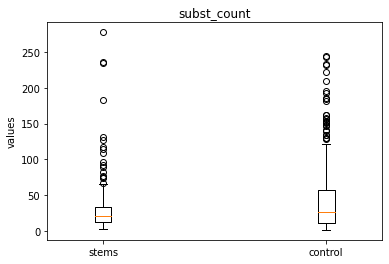

Equal distros
MannwhitneyuResult(statistic=71418.0, pvalue=0.18264806820356083)


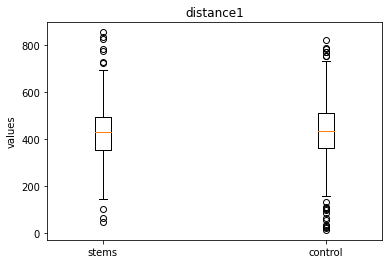

Equal distros
MannwhitneyuResult(statistic=70576.5, pvalue=0.1199319396406831)


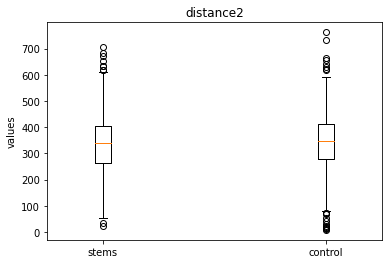

In [4]:
for fea in _feas:
    xr = regions[fea].dropna()
    xc = controls[fea].dropna()
    
    stest = stats.mannwhitneyu(xr, xc)
    if stest.pvalue < .05:
        print('Different distros')
    else:
        print('Equal distros')
    print(stest)
#     print(stats.ttest_ind(xr, xc))
        
    plt.boxplot([xr], positions=[0], labels=['stems'])
    plt.boxplot([xc], positions=[2], labels=['control'])
    plt.title(fea)
    plt.ylabel('values')
    plt.show()

## Check if samples from united regions have difference

In [29]:
from add_features_to_rerions import build_region_feature

reglen = 20
window_size = 20
regions = build_region_feature(PATH_TO_REGIONS,
    only_nsubst=False, window_size=window_size, region_len=reglen)

controls = build_region_feature(PATH_TO_CONTROL_REGIONS_ROUGH, 
    only_nsubst=False, window_size=window_size, region_len=reglen)


_feas = ['subst_count', 'distance1', 'distance2']
for fea in _feas:
    regions[fea] = [x[0] for x in regions[fea].values]
    controls[fea] = [x[0] for x in controls[fea].values]

window size: 20
window size: 20


regions ShapiroResult(statistic=0.7391587495803833, pvalue=6.592369389059101e-37)
controls ShapiroResult(statistic=0.8781747221946716, pvalue=2.9079606600653152e-27)

U-test: statistic=336652.0, pval=5.615991564877793e-37
Different distros
means: 26.89, 39.44
medians: 21.50, 34.04


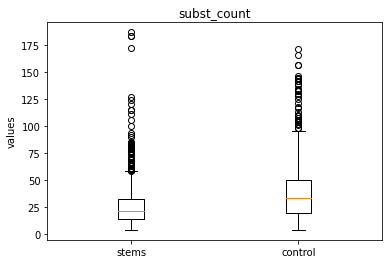

regions ShapiroResult(statistic=0.9961663484573364, pvalue=0.01439426839351654)
controls ShapiroResult(statistic=0.9880346059799194, pvalue=2.7925469225920097e-07)

U-test: statistic=474985.0, pval=0.026364670846890512
Different distros
means: 430.55, 434.97
medians: 430.15, 440.37


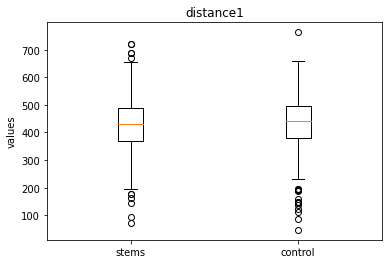

regions ShapiroResult(statistic=0.9936399459838867, pvalue=0.00029087497387081385)
controls ShapiroResult(statistic=0.9894207119941711, pvalue=1.2999494174437132e-06)

U-test: statistic=459542.0, pval=0.0008650239951028169
Different distros
means: 336.68, 346.47
medians: 336.61, 350.39


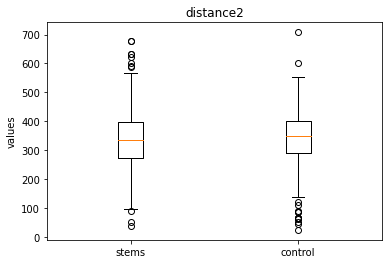

In [30]:
for fea in _feas:
    xr = regions[fea].dropna()
    xc = controls[fea].dropna()
    
    print('regions', stats.shapiro(xr))
    print('controls', stats.shapiro(xc))
    print()
    
    if stats.shapiro(xr).pvalue > .05 and stats.shapiro(xc).pvalue > .05:
        print('Both are normal samples')
        print(stats.ttest_ind(xr, xc))
    
    stest = stats.mannwhitneyu(xr, xc)
    print(f'U-test: statistic={stest.statistic}, pval={stest.pvalue}')
    if stest.pvalue < .05:
        print('Different distros')
    else:
        print('Equal distros')
    print(f'means: {xr.mean():.2f}, {xc.mean():.2f}')
    print(f'medians: {xr.median():.2f}, {xc.median():.2f}')
    
    plt.boxplot([xr, xc], positions=[0, 1], labels=['stems', 'control'])
    plt.title(fea)
    plt.ylabel('values')
    plt.show()